# Bike sharing assignment - Multiple Linear Regression

- Submitted by Rajeshraj Anakkara

## Problem statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.


## Objective
Build a model and find variables significant for the demand of shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Understanding and Reading dataset

In [104]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [105]:
#Loading data
df_bikeshare = pd.read_csv("day.csv")

In [106]:
df_bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [107]:
# Getting the details of data
df_bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [108]:
df_bikeshare.shape

(730, 16)

In [109]:
df_bikeshare.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There is no NUll values in the dataset.

In [110]:
df_bikeshare.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

The dataset does not have single value columns.

In [111]:
df_bikeshare[df_bikeshare.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


There is no duplicate records in the dataset.

## Data cleaning

### Dropping Columns that are not required for analysis

In [112]:
df_bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- `instant` is a Row identifier which has no relevance for our analysis.
- `dteday` This column can be removed as we have `yr` , `mnth`,`weekday`,`workingday` columns for analysis. 
- `casual` and `registered` can be removed where we have `cnt` as target variable and total of `casual` and `registered` forms target variable.

In [113]:
# Dropping instant which is a Row identifier which had no relevence for our analysis.
df_bikeshare.drop(['instant'],axis=1,inplace=True)

# Dropping dteday 
df_bikeshare.drop(['dteday'],axis=1,inplace=True)

# Dropping casual
df_bikeshare.drop(['casual'],axis=1,inplace=True)

# Dropping registered
df_bikeshare.drop(['registered'],axis=1,inplace=True)

In [114]:
df_bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


- Updating Specific values for Categorical Columns
- Categorical columns are `Season` , `yr` , `mnth` , `holiday` , `weekday` , `workingday` , `weathersit`
- Numeric columns are `temp` , `atemp` , `hum` , `windspeed` , `cnt`
    - season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or n( 0 Not-Holiday , 1 Holiday)le)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, 
  Snow + Fog

- Since weathersit has long description, Converting this to 1: Good , 2: Moderate , 3:Bad , 4:Severe

In [115]:
df_bikeshare['season']= df_bikeshare['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df_bikeshare['yr'] = df_bikeshare['yr'].replace({0: '2018', 1:'2019'})
df_bikeshare['mnth']=df_bikeshare['mnth'].replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
df_bikeshare['holiday']=df_bikeshare['holiday'].replace({0:'Not-Holiday' , 1:'Holiday'})
df_bikeshare['workingday']=df_bikeshare['workingday'].replace({0:'Not-Working-Day' , 1:'Working-Day'})
df_bikeshare['weekday']=df_bikeshare['weekday'].replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df_bikeshare['weathersit']=df_bikeshare['weathersit'].replace({1: 'Good' , 2: 'Moderate' , 3:'Bad' , 4:'Severe'})

In [116]:
df_bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,Not-Holiday,sat,Not-Working-Day,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,Not-Holiday,sun,Not-Working-Day,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,Not-Holiday,mon,Working-Day,Good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,Not-Holiday,tue,Working-Day,Good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,Not-Holiday,wed,Working-Day,Good,9.305237,11.46350,43.6957,12.522300,1600


### Verifying Outliers

In [117]:
num_columns= ['temp','atemp','hum','windspeed']
Cat_columns =['season','yr','mnth','holiday','workingday','weekday','weathersit']

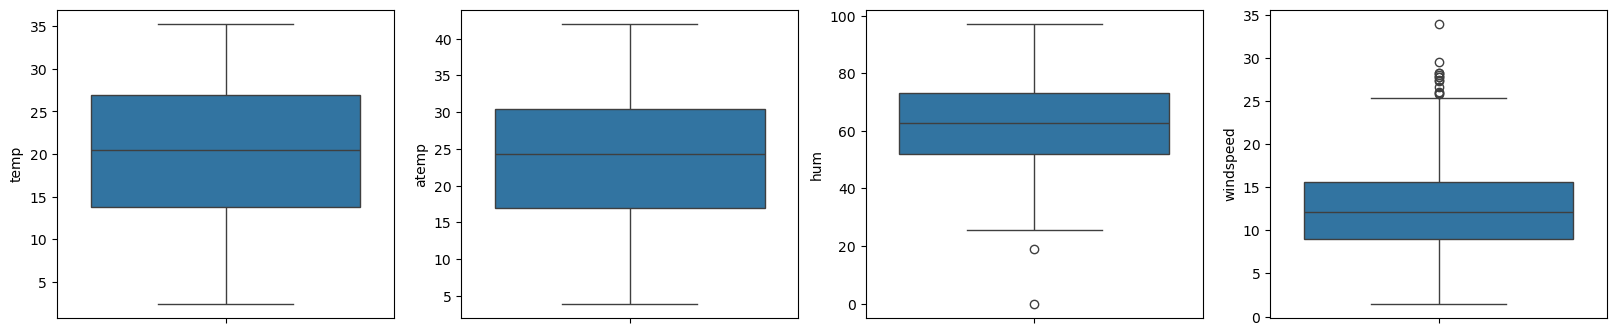

In [118]:
plt.figure(figsize = (20,4))
i=1
for col in num_columns:
    plt.subplot(1,4,i)
    sns.boxplot(y=col , data = df_bikeshare)
    i=i+1

- There is no outliers to be handled in this dataset. 

## Exploratory data analysis

### Visualizing Numeric variables

#### Checking linear relationship between numeric variables

<Figure size 1000x2000 with 0 Axes>

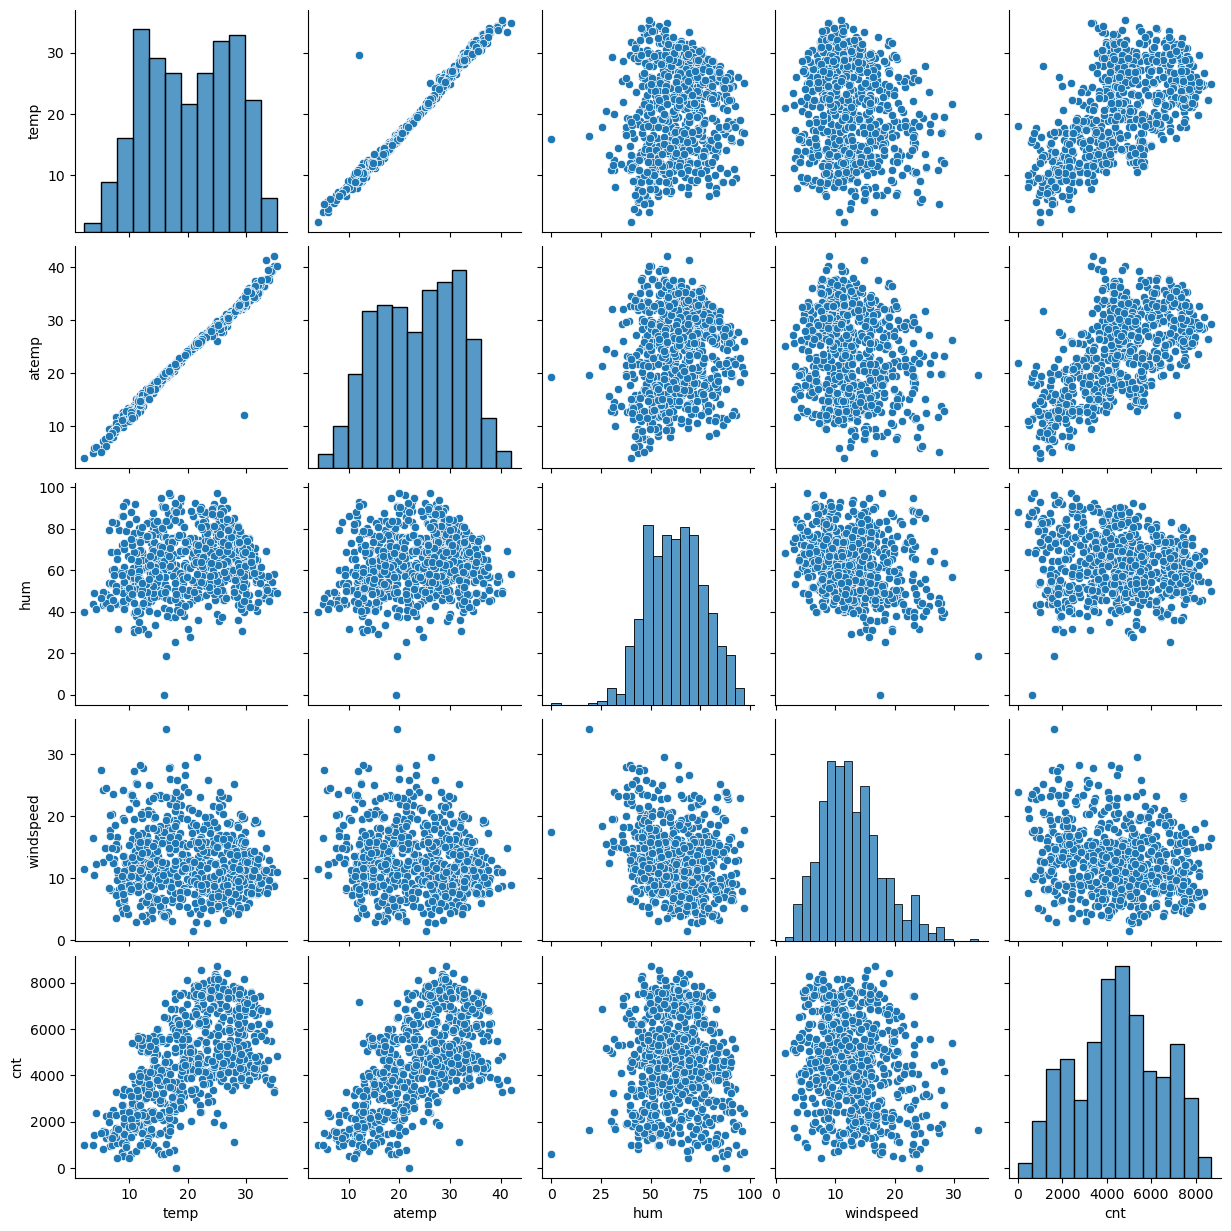

In [119]:
plt.figure(figsize=(10,20))
sns.pairplot( data =df_bikeshare, vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

- Temp and atemp are highly correlated to each other
- Temp and atemp are highly correlated to target variable `cnt`.

<Axes: >

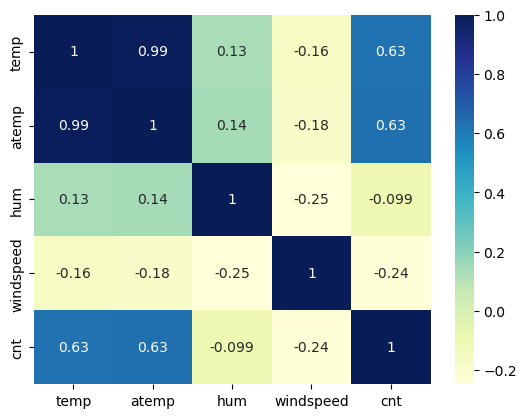

In [120]:
# Verifying corelation between Numeric variables
sns.heatmap(df_bikeshare[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True,cmap='YlGnBu')

- Here temp and atemp has a correlation near to 1 ( 0.99 ).
- Also temp and atemp has high correlation with target variable cnt ( 0.63 ).

#### Checking relationship of Categorical variable with target variable

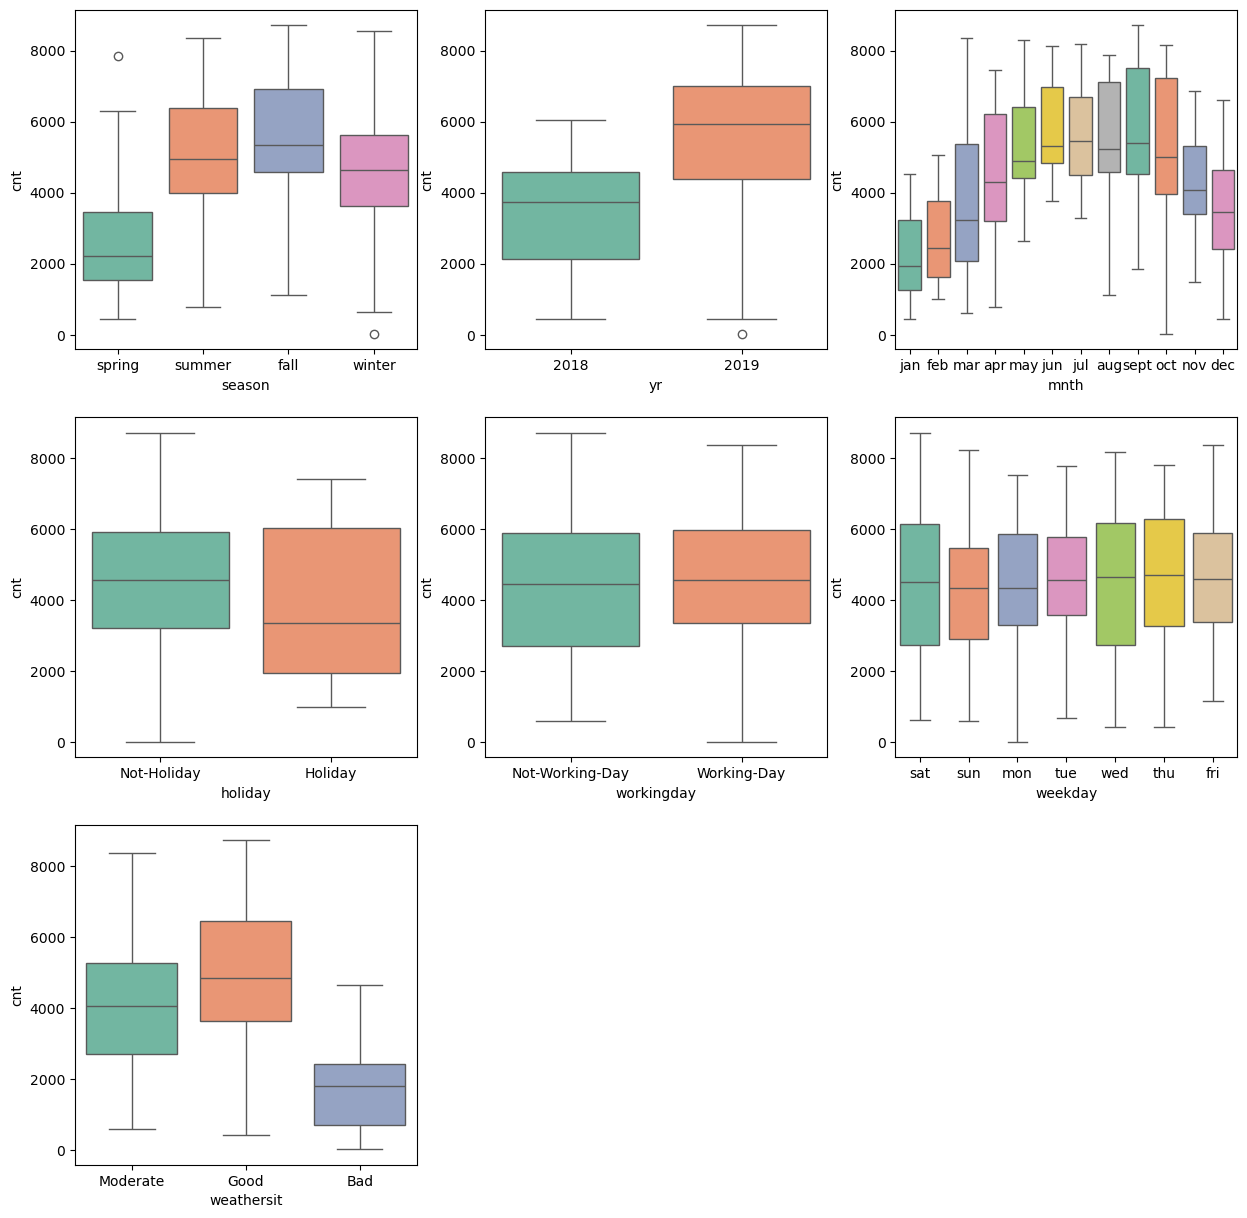

In [121]:
# using Cat_columns list declared earlier
plt.figure(figsize = (15,15))

for i, cat_col in enumerate(Cat_columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df_bikeshare, x=cat_col,y='cnt', hue=cat_col, palette="Set2")
plt.show()


- Fall season has highest demand on rental bikes.
- Compared to 2018, 2019 has highest demand
- September month has highest demand for rental bikes. The demand is less at the start and end of the year.
- Rental bikes are on demand on holidays and not on working days.
- Weather has an impact on demand, it's high during good weather. 

#### Verifying correlation between all variables

In [122]:
df_bikeshare_cp = pd.read_csv("day.csv")
# Dropping instant which is a Row identifier which had no relevence for our analysis.
df_bikeshare_cp.drop(['instant'],axis=1,inplace=True)

# Dropping dteday 
df_bikeshare_cp.drop(['dteday'],axis=1,inplace=True)

# Dropping casual
df_bikeshare_cp.drop(['casual'],axis=1,inplace=True)

# Dropping registered
df_bikeshare_cp.drop(['registered'],axis=1,inplace=True)

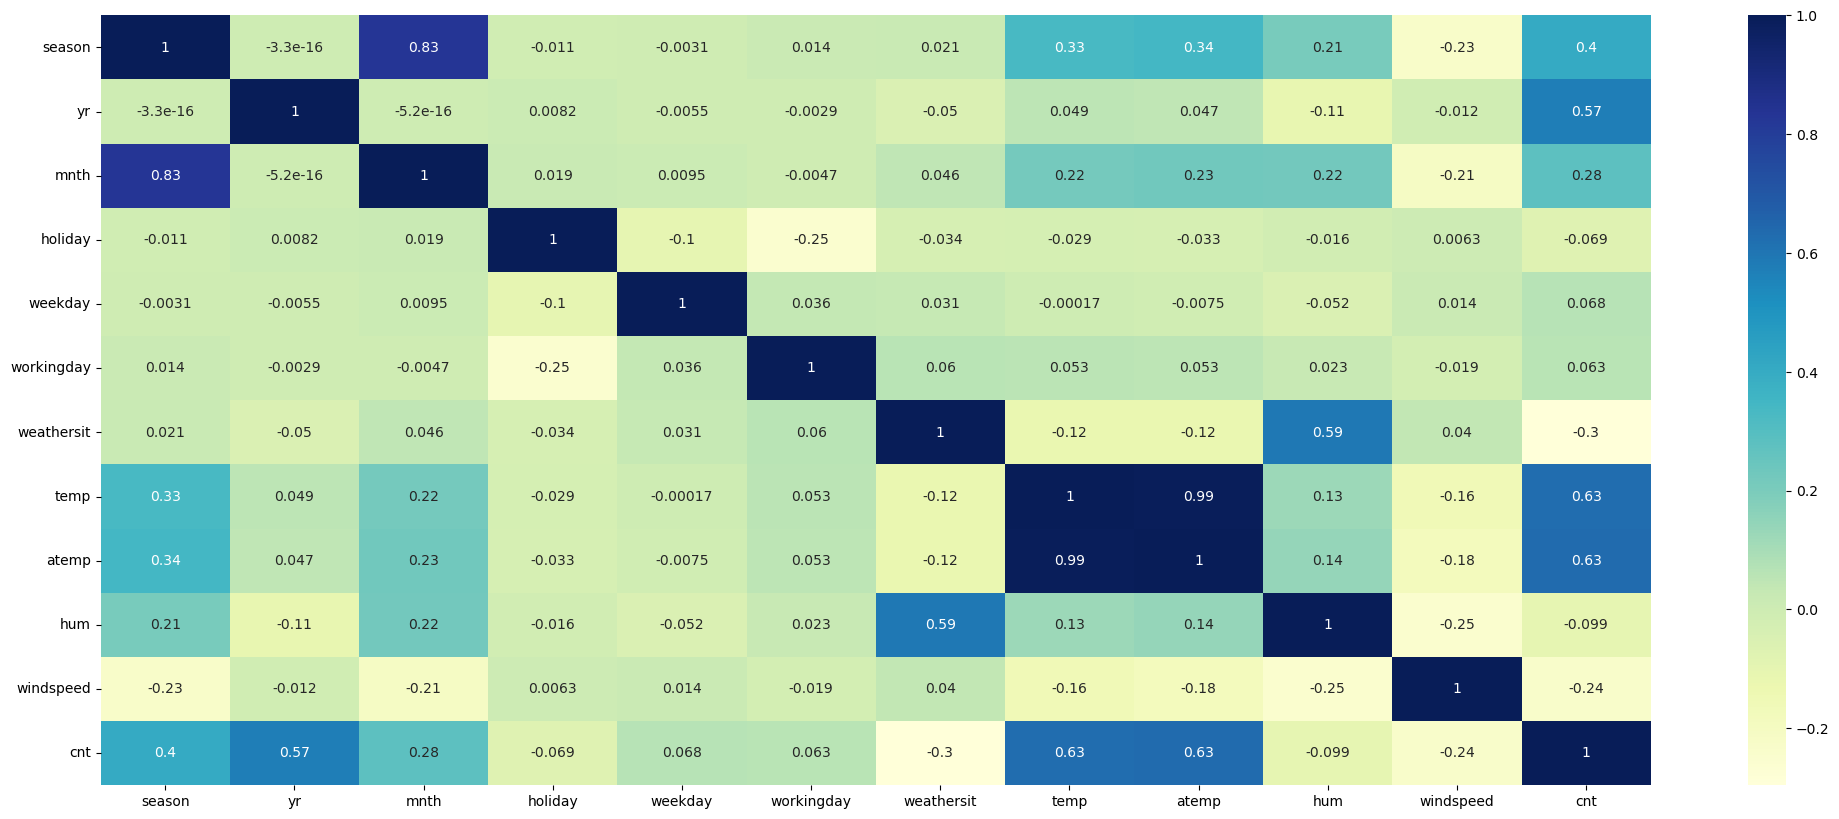

In [123]:
plt.figure(figsize=(25,10))
sns.heatmap(df_bikeshare_cp.corr(), annot=True,cmap='YlGnBu')
plt.show()

- Here the target variable is related to most of the variables. Showing a positive sign to build a model using Linear regression.

## Data preperation

In [124]:
df_bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,Not-Holiday,sat,Not-Working-Day,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,Not-Holiday,sun,Not-Working-Day,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,Not-Holiday,mon,Working-Day,Good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,Not-Holiday,tue,Working-Day,Good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,Not-Holiday,wed,Working-Day,Good,9.305237,11.46350,43.6957,12.522300,1600


In [125]:
df_bikeshare.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

- Creating dummy variables

In [126]:
df_bikeshare = pd.get_dummies(data=df_bikeshare , columns=['season','yr','mnth', 'holiday', 'weekday', 'workingday',
                                                                'weathersit'], drop_first=True)
  

In [127]:
df_bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temp                    730 non-null    float64
 1   atemp                   730 non-null    float64
 2   hum                     730 non-null    float64
 3   windspeed               730 non-null    float64
 4   cnt                     730 non-null    int64  
 5   season_spring           730 non-null    bool   
 6   season_summer           730 non-null    bool   
 7   season_winter           730 non-null    bool   
 8   yr_2019                 730 non-null    bool   
 9   mnth_aug                730 non-null    bool   
 10  mnth_dec                730 non-null    bool   
 11  mnth_feb                730 non-null    bool   
 12  mnth_jan                730 non-null    bool   
 13  mnth_jul                730 non-null    bool   
 14  mnth_jun                730 non-null    bo

In [128]:
df_bikeshare.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'yr_2019', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'mnth_sept', 'holiday_Not-Holiday',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'workingday_Working-Day',
       'weathersit_Good', 'weathersit_Moderate'],
      dtype='object')

In [129]:
# Converting columns to int
bk_columns = ['season_spring',
       'season_summer', 'season_winter', 'yr_2019', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'mnth_sept', 'holiday_Not-Holiday',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'workingday_Working-Day',
       'weathersit_Good', 'weathersit_Moderate' ]
df_bikeshare[bk_columns] = df_bikeshare[bk_columns].astype(int)

In [130]:
df_bikeshare.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,...,holiday_Not-Holiday,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_Working-Day,weathersit_Good,weathersit_Moderate
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,1,1,0,0,0,0,0,1,1,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,1,0,0,0,0,0,1,1,1,0


In [131]:
df_bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temp                    730 non-null    float64
 1   atemp                   730 non-null    float64
 2   hum                     730 non-null    float64
 3   windspeed               730 non-null    float64
 4   cnt                     730 non-null    int64  
 5   season_spring           730 non-null    int32  
 6   season_summer           730 non-null    int32  
 7   season_winter           730 non-null    int32  
 8   yr_2019                 730 non-null    int32  
 9   mnth_aug                730 non-null    int32  
 10  mnth_dec                730 non-null    int32  
 11  mnth_feb                730 non-null    int32  
 12  mnth_jan                730 non-null    int32  
 13  mnth_jul                730 non-null    int32  
 14  mnth_jun                730 non-null    in

## Model Building

### Splitting the Data into Training and Testing Sets

In [132]:
# Importing sklearn library
from sklearn.model_selection import train_test_split

In [133]:
# Checking shape before splitting
df_bikeshare.shape

(730, 30)

In [134]:
# assigning Target variableto y
y= df_bikeshare.pop('cnt')

# Assigning all remaining variables to X
X = df_bikeshare

# Splitting Train test as 70:30 ratio
np.random.seed(0)
X_train , X_test , y_train , y_test =train_test_split(X,y, train_size=0.7 , test_size = 0.3, random_state =100)


In [135]:
# verifying X
X.head()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,...,holiday_Not-Holiday,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_Working-Day,weathersit_Good,weathersit_Moderate
0,14.110847,18.18125,80.5833,10.749882,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,14.902598,17.68695,69.6087,16.652113,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1,0,0,0,0,0,...,1,1,0,0,0,0,0,1,1,0
3,8.200000,10.60610,59.0435,10.739832,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
4,9.305237,11.46350,43.6957,12.522300,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,1,0


In [136]:
# Verifying y
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [137]:
X_train.shape

(510, 29)

In [138]:
X_test.shape

(219, 29)

### Scaling numeric variables on X_train dataset

In [139]:
# importing required libraries
from sklearn.preprocessing import MinMaxScaler

In [140]:
# scaling numeric variables
num_columns= ['temp','atemp','hum','windspeed']

scalar = MinMaxScaler()

# Transform training set
X_train[num_columns]= scalar.fit_transform(X_train[num_columns])

In [141]:
# verifying X_train
X_train.head()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,...,holiday_Not-Holiday,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_Working-Day,weathersit_Good,weathersit_Moderate
653,0.509887,0.501133,0.575354,0.300794,0,0,1,1,0,0,...,1,0,0,0,0,1,0,1,1,0
576,0.815169,0.766351,0.725633,0.264686,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,1,0
426,0.442393,0.438975,0.640189,0.255342,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
728,0.245101,0.200348,0.498067,0.663106,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
482,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1


### Building Model using RFE and Automated approach

In [142]:
# importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [143]:
# Linear regression model building using sklearn 
lr=LinearRegression()
lr.fit( X_train,y_train)

LinearRegression()

In [144]:
# Cut dowm features to 15
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [145]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 11),
 ('mnth_sept', True, 1),
 ('holiday_Not-Holiday', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('workingday_Working-Day', True, 1),
 ('weathersit_Good', True, 1),
 ('weathersit_Moderate', True, 1)]

- Eliminated few columns as suggested by RFE. We will first build the model using the varibles provided by RFE.

In [146]:
# improting required libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Method to build Model using Statsmodel

In [147]:
# Method to build a model using statsmodel api and print summary
def model_build(cols):
    X_train_sm= sm.add_constant(X_train[cols])
    lm=sm.OLS(y_train,X_train_sm).fit()
    print(lm.summary())
    return lm    

#### Method to display VIF 

In [148]:
# Method to display VIF
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### Model 1 - Incorporating all variables recomended by RFE

In [149]:
print(X_train.columns[rfe.support_])

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_jan', 'mnth_jul', 'mnth_sept',
       'holiday_Not-Holiday', 'weekday_sat', 'workingday_Working-Day',
       'weathersit_Good', 'weathersit_Moderate'],
      dtype='object')


In [150]:
X_cols =['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_jan', 'mnth_jul', 'mnth_sept',
       'holiday_Not-Holiday', 'weekday_sat', 'workingday_Working-Day',
       'weathersit_Good', 'weathersit_Moderate']
model_build(X_cols)
get_vif(X_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          2.31e-191
Time:                        14:02:21   Log-Likelihood:                -4105.9
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -467

- holiday_Not-Holiday has the highest VIF of 37.14. Its significance is lower compared to others. Hence we need to train the Model removing holiday_Not-Holiday

### Model 2 - Removing holiday_Not-Holiday due to High VIF

In [151]:
X_cols =['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_jan', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'workingday_Working-Day',
       'weathersit_Good', 'weathersit_Moderate']
model_build(X_cols)
get_vif(X_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.9
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.70e-191
Time:                        14:02:21   Log-Likelihood:                -4108.3
No. Observations:                 510   AIC:                             8247.
Df Residuals:                     495   BIC:                             8310.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -31

- Here Hum has high VIF and also had negetive coeficient

### Model 3 - Removing hum due to high VIF and has negative coefficient

In [152]:
X_cols =['temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_jan', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'workingday_Working-Day',
       'weathersit_Good', 'weathersit_Moderate']
model_build(X_cols)
get_vif(X_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          4.11e-189
Time:                        14:02:21   Log-Likelihood:                -4116.8
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     496   BIC:                             8321.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1063

### Model 4 - Removing Wind speed which has negative coefficient 

In [153]:
X_cols =['temp', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_jan', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'workingday_Working-Day',
       'weathersit_Good', 'weathersit_Moderate']
model_build(X_cols)
get_vif(X_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.2
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          5.44e-182
Time:                        14:02:21   Log-Likelihood:                -4136.5
No. Observations:                 510   AIC:                             8299.
Df Residuals:                     497   BIC:                             8354.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1695

### Model 5 Removing mnth_jan which has negative coefficient

In [154]:
X_cols =['temp', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'workingday_Working-Day',
       'weathersit_Good', 'weathersit_Moderate']
model_build(X_cols)
get_vif(X_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.9
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          9.28e-183
Time:                        14:02:21   Log-Likelihood:                -4137.5
No. Observations:                 510   AIC:                             8299.
Df Residuals:                     498   BIC:                             8350.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1761

### Model 6 mnth_jul which has negative coefficient

In [155]:
X_cols =['temp', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_sept',
       'weekday_sat', 'workingday_Working-Day',
       'weathersit_Good', 'weathersit_Moderate']
model_build(X_cols)
get_vif(X_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.5
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.55e-182
Time:                        14:02:21   Log-Likelihood:                -4140.8
No. Observations:                 510   AIC:                             8304.
Df Residuals:                     499   BIC:                             8350.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1846

### Model 7 Removing season_spring which has negative coefficient

In [156]:
X_cols =['temp', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_sept',
       'weekday_sat', 'workingday_Working-Day',
       'weathersit_Good', 'weathersit_Moderate']
model_build(X_cols)
get_vif(X_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.5
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          9.24e-182
Time:                        14:02:21   Log-Likelihood:                -4145.5
No. Observations:                 510   AIC:                             8311.
Df Residuals:                     500   BIC:                             8353.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2516

- R-Squared which is 0.823 indicates that 82.3% of of the variability with dependent variable (cnt) is explained by the independent variables.
- Adjusted R-squared is 0.82 which indicates the value adjust the R-squared for the number of predictors is also high and fits the training data.
- All P-Value is 0.000 which indicates that the variables are statistically significant. The predictors can meaningfully contribute to the model.
- The VIF values are less than 10. This indicates that the multicollinearity is not a big concern, which means the estimates of coefficients are likely to be stable.
- A High F-statistic indicates that the model is statistically significant overall.
- With the above inferences, The Model fits the training data.

### Building a final model

In [157]:
# Build a model with all columns using sklearn
def build_model_skLearn(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [158]:
# Building a final model
X_cols_final =['temp', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_sept',
       'weekday_sat', 'workingday_Working-Day',
       'weathersit_Good', 'weathersit_Moderate']

lr = build_model_skLearn(X_train[X_cols_final],y_train)
print(lr.intercept_,lr.coef_)


-2516.1227812348197 [4996.87586774  710.79079623 1210.97009868 2014.30394638  900.30953146
  569.99384036  500.28784967 2634.46812965 1943.97964787]


### Residual Analysis of the train data

#### Checking error terms

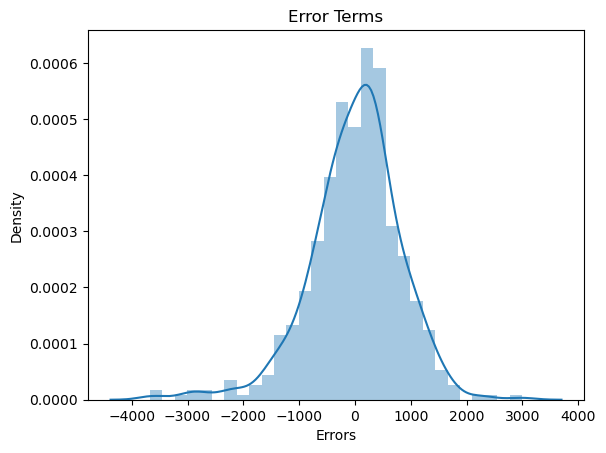

In [159]:
y_train_pred = lr.predict(X_train[X_cols_final])
Error = y_train-y_train_pred
sns.distplot(Error)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

- Errors are normally distributed here with mean 0. This indicates that the regression model is well specified and the statistical inferences are also reliable.

#### Validating Actual and Predicted of y_train and y_predicted

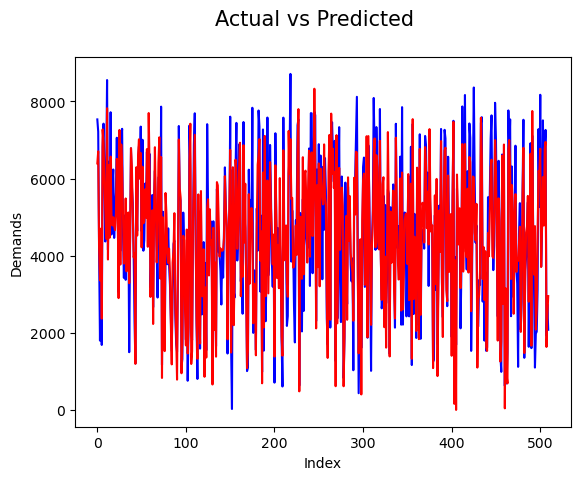

In [160]:
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

- Actual and predicted follows the same pattern. So the model looks fine

In [161]:
# verifying R-squared value
r2_score(y_train, y_train_pred)

0.8231205032132866

- The R-squared value is same as we have in the final model.

#### Validating Error terms of y_train & y_predicted

In [162]:
def plot_err_terms(act,pred,X_t):
    c = [i for i in range(0,len(X_t),1)]
    fig = plt.figure(figsize=(10,5))
    plt.plot(c,act-pred, color="green", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label


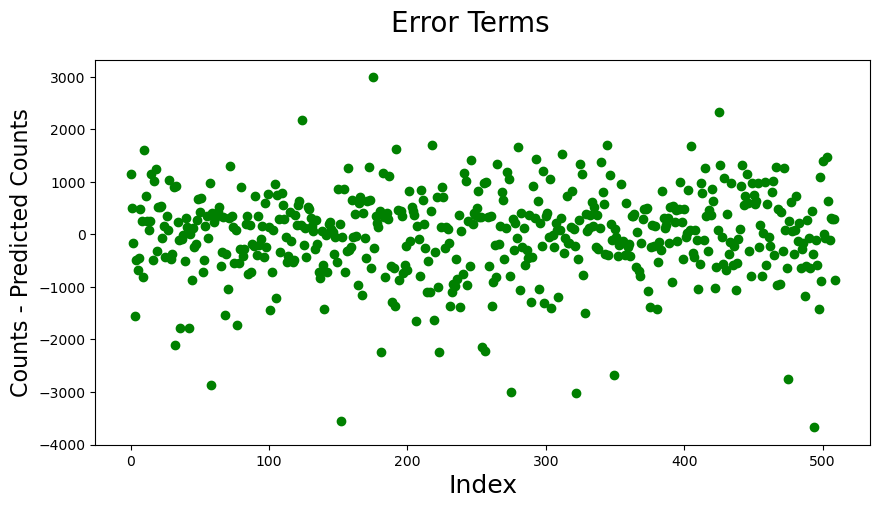

In [163]:
plot_err_terms(y_train, y_train_pred,X_train)

- Error terms are randomly distributed and no pattern can be drawn. Also they seem to be independent.

## Making Predictions Using the Final Model on Test set

#### Scaling numeric variables on X_test dataset

In [164]:
from sklearn.preprocessing import StandardScaler
# scaling numeric variables
num_colums= ['temp','atemp','hum','windspeed']

# Transform test set only, No fitting
X_test[num_colums]= scalar.transform(X_test[num_colums])

#### Predict values based on Final model into test dataset

In [165]:
cols= ['temp', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_sept',
       'weekday_sat', 'workingday_Working-Day',
       'weathersit_Good', 'weathersit_Moderate']
#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

In [166]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8000754489099356

- R-squared value of test data which is 0.800 is very close to the train data which is 0.823. This consistency suggests that the model performs similarly on both the training set and the unseen test set.
- The value of test data and train data are close which also indicates there is no overfitting.


## Model Evaluation

####  Plotting y_test and y_test_pred to understand the spread

Text(0, 0.5, 'y_test_pred')

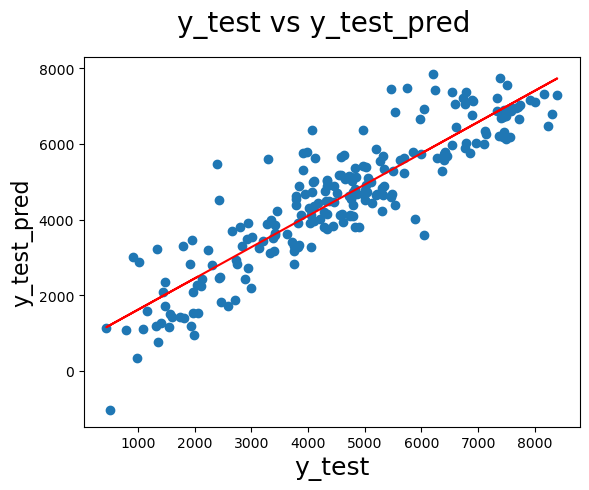

In [167]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
m, b = np.polyfit(y_test, y_test_pred, 1)  # 1 indicates a linear fit
plt.plot(y_test, m * y_test + b, color='red')

fig.suptitle('y_test vs y_test_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)

- This shows a linear relationship which confirms that the model correctly fitted

#### Plot Test vs Predicted test values

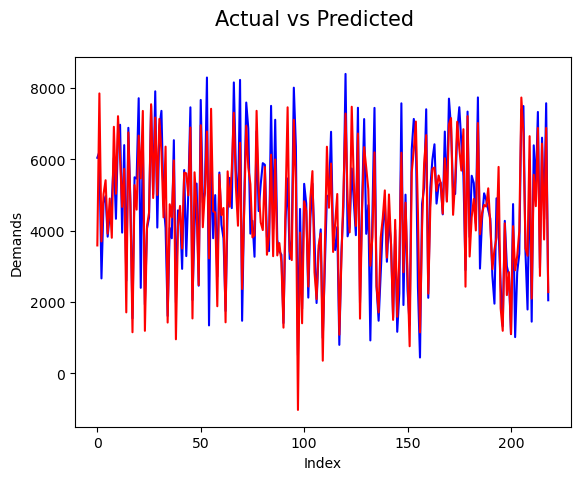

In [168]:
c = [i for i in range(0,len(X_test),1)]
plt.plot(c,y_test, color="blue")
plt.plot(c,y_test_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

- Prediction of test data is very close to actuals

#### Validating Error terms of y_test & y_predicted

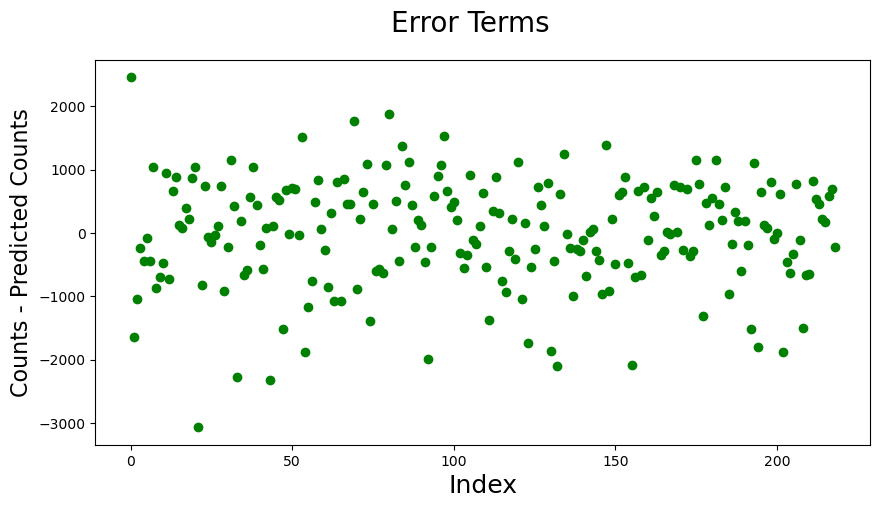

In [169]:
plot_err_terms(y_test, y_test_pred,X_test)

- The Error terms are randomly scattered and error terms are around 0 which indicates the model is performing well.
- There is no outliers where the model is robust and will not be overly influenced by extreme values.

## Summary

### Significant variables
1. **Temperature**
    - Coefficient : 4996.876
    - Significance : Highly significant (p-value < 0.0001).
    - interpretation : Higher temperatures lead to increase in bike demand.
2. **Season**
    - Summer
        - Coefficient : 710.791
        - Significant : Highly significant (p-value < 0.0001).
    - Winter
        - Coefficient : 1210.971
        - Significant : Highly significant (p-value < 0.0001).
    - interpretation : Demand is higher during Summer and winter season.
3. **Year**
    - Coefficient : 2014.304
    - Significance : Highly significant (p-value < 0.0001).
    - interpretation : There is a growing demand on bikes year on year.
4. **Month**
    - Coefficient : 900.310
    - Significance : Highly significant (p-value < 0.0001).
    - interpretation : Demand is higher in September month.
5. **Weekday**
    - Coefficient : 569.994
    - Significance : Highly significant (p-value < 0.0001).
    - interpretation : Demand is higher on Saturdays.
6. **Working-day**
    - Coefficient : 500.288
    - Significance : Highly significant (p-value < 0.0001).
    - interpretation : Demand is higher on working days.
7. **Weather Condition**
    - Good Weather
        - Coefficient : 2634.468
        - Significance : Highly significant (p-value < 0.0001).
    - Moderate weather
        - Coefficient : 2634.468
        - Significance : Highly significant (p-value < 0.0001).
    - Interpretation : Better weather conditions significantly increase bike demand

### How well Significant variables describe the bike demand
1. **R-squared Value :**
    - R-squared value of test data which is 0.800 is very close to the train data which is 0.823, which means the R-squared values for the training and test data are quite close (0.823 for training and 0.800 for testing). This consistency suggests that the model performs similarly on both the training set and the unseen test set.This indicates that approximately 80% to 82% of the variance in bike demand can be explained by the variables included in the model. This suggests a strong fit.

2. **Statistical Significance :**
    - All significant variables (with p-values < 0.05) reinforce that they are likely to have a real effect on bike-sharing demand.
3. **Model Adequacy:**
    - The adjusted R-squared value accounts for the number of predictors in the model, indicating that the model maintains a good explanatory power even when considering model complexity.

### Recommendations for high Profits
1. `Summer Campaigns:` Implement targeted marketing campaigns during the summer and winter months to capitalize on higher demand.
2. `Weather-Based Promotions:` Offer discounts or promotions on days with favorable weather conditions to attract more users.
3. `Targeted Marketing:` Focus on increasing awareness and accessibility in urban areas where temperatures are likely to rise and where biking is a feasible commuting option.
4. `Enhance User Experience:` Improve bike availability and maintenance during peak seasons, particularly in good weather, to ensure customer satisfaction and repeat usage.
5. `Community Engagement:` Partner with local events, especially during weekends, to provide bike rentals, which can increase visibility and usage.
